In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('olympics_medals_country_wise.csv')
data.head(3)

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,(ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,(ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77


In [33]:
summer_data = data.loc[:, ['countries','summer_participations', 'summer_gold', 'summer_silver', 'summer_bronze', 'summer_total']]
summer_data

,countries,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total
0,Afghanistan,15,0,0,2,2
1,Algeria,14,5,4,8,17
2,Argentina,25,21,26,30,77
3,Armenia,7,2,8,8,18
4,Australasia,2,3,4,5,12
...,...,...,...,...,...,...
151,Zambia,14,0,1,1,2
152,Zimbabwe,14,3,4,1,8
153,Independent Olympic Athletes,3,1,0,1,2
154,Independent Olympic Participants,1,0,1,2,3


In [47]:
data.summer_participations.dtype

dtype('int64')

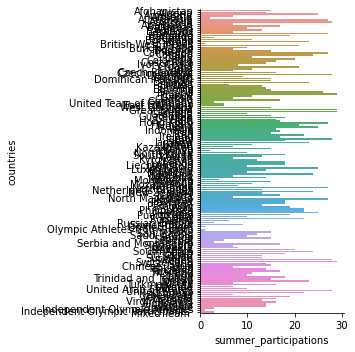

In [50]:
data1 = summer_data = data.loc[:, ['countries','summer_participations']]
plt.figure(figsize=(20,10))
sns.catplot(data=data1, x='summer_participations',y='countries', kind='bar')

____

## The beginning. 
Understanding the dataset, its columns and information.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   ioc_code               156 non-null    object
 2   summer_participations  156 non-null    int64 
 3   summer_gold            156 non-null    object
 4   summer_silver          156 non-null    int64 
 5   summer_bronze          156 non-null    int64 
 6   summer_total           156 non-null    object
 7   winter_participations  156 non-null    int64 
 8   winter_gold            156 non-null    int64 
 9   winter_silver          156 non-null    int64 
 10  winter_bronze          156 non-null    int64 
 11  winter_total           156 non-null    int64 
 12  total_participation    156 non-null    int64 
 13  total_gold             156 non-null    object
 14  total_silver           156 non-null    int64 
 15  total_bronze           

In [ ]:
data.shape

(156, 17)

### Dataset health

In [ ]:
# let's check the duplicated
data.duplicated().sum()

0

In [ ]:
# let's check the null
data.isnull().sum()

countries                0
ioc_code                 0
summer_participations    0
summer_gold              0
summer_silver            0
summer_bronze            0
summer_total             0
winter_participations    0
winter_gold              0
winter_silver            0
winter_bronze            0
winter_total             0
total_participation      0
total_gold               0
total_silver             0
total_bronze             0
total_total              0
dtype: int64

A too perfect dataset.